In [93]:
# import all relevant libraries
import pandas as pd
import numpy as np
import uuid
import re
import json
from pandas.plotting import register_matplotlib_converters
from pandas import json_normalize

In [94]:
# import weather data
weather = pd.read_csv("weather_burbank_airport.csv", encoding = "ISO-8859-1")
weather.head()

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,Burbank,2018-01-01 08:53:00,9.0,33.0,Fair,991.75,9.0,0.0,8.0
1,Burbank,2018-01-01 09:53:00,9.0,33.0,Fair,992.08,0.0,0.0,9.0
2,Burbank,2018-01-01 10:53:00,9.0,21.0,Haze,992.08,0.0,0.0,9.0
3,Burbank,2018-01-01 11:53:00,9.0,29.0,Partly Cloudy,992.08,0.0,0.0,9.0
4,Burbank,2018-01-01 12:53:00,8.0,33.0,Fair,992.08,0.0,0.0,8.0


In [95]:
print(weather['city'].unique())

['Burbank']


In [96]:
#Remove first Column because every cell has the same value (Burbank).
weather = weather.drop(columns=['city'])
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29244 entries, 0 to 29243
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                29244 non-null  object 
 1   temperature              29219 non-null  float64
 2   cloud_cover              29224 non-null  float64
 3   cloud_cover_description  29224 non-null  object 
 4   pressure                 29236 non-null  float64
 5   windspeed                29158 non-null  float64
 6   precipitation            29244 non-null  float64
 7   felt_temperature         29218 non-null  float64
dtypes: float64(6), object(2)
memory usage: 1.8+ MB


In [97]:
#convert to correct datetime
weather['timestamp'] = pd.to_datetime(weather['timestamp'])
print(weather.dtypes)

timestamp                  datetime64[ns]
temperature                       float64
cloud_cover                       float64
cloud_cover_description            object
pressure                          float64
windspeed                         float64
precipitation                     float64
felt_temperature                  float64
dtype: object


In [98]:
# print for each row how many null values there are
print(weather.isna().sum())

timestamp                   0
temperature                25
cloud_cover                20
cloud_cover_description    20
pressure                    8
windspeed                  86
precipitation               0
felt_temperature           26
dtype: int64


We have 22 different types of description (one category is NaN)

In [99]:
# Replace null values in temperature with mean
weather['temperature'] = weather['temperature'].fillna(weather['temperature'].mean(skipna=True))

# Replace null values in cloud_cover with mean
weather['cloud_cover'] = weather['cloud_cover'].fillna(weather['cloud_cover'].mean(skipna=True)) 

#Replace null values of windspeed with median as the data is not normal distributed (see code right below)
weather['windspeed'] = weather['windspeed'].fillna(weather['cloud_cover'].median(skipna=True)) 


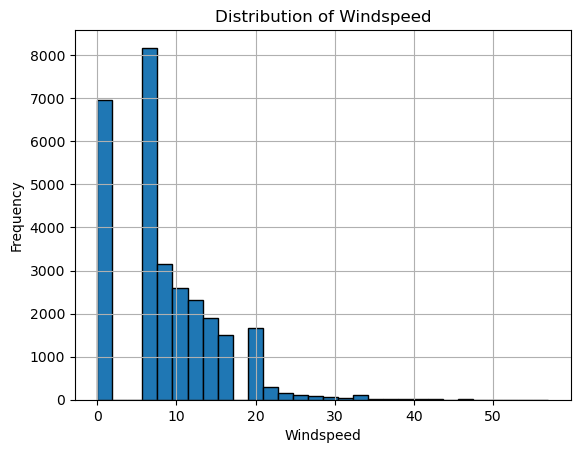

In [100]:
import matplotlib.pyplot as plt

# Show distribution of windspeed in histogram
weather['windspeed'].hist(bins=30, edgecolor='black')

plt.title('Distribution of Windspeed')
plt.xlabel('Windspeed')
plt.ylabel('Frequency')
plt.show()



<h5/>Fill the null values for cloud_cover description with forward propagating because each row always has a difference of one hour and the dataset is already sorted by date -> description of a null value and its predecessor should be very similar because in a span of one hour, the cloud_cover description shouldn't change that much

In [101]:
weather['cloud_cover_description'] = weather['cloud_cover_description'].ffill()

In [102]:
weather.to_csv('weather_cleaned.csv', index=False)